Import all of required  Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report

In [3]:
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix

In [4]:
df1 = pd.read_csv('features.csv')
df1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
df1.drop(columns="respondent_id",axis=1,inplace= True)

In [6]:
df2 = pd.read_csv('labels.csv')
df2.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [7]:
df2.drop(columns="respondent_id",axis=1,inplace= True)

In [8]:
df2.head()

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# Domain Analysis

The dataset is about this to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. In specific, 
the target is to predict two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.
It is a multi-label classification problem.

h1n1_concern  -About H1N1 Virus
h1n1_knowledge -People  knowldege about H1N1 Virus
behavioral_antiviral_meds - Antiviral medicine wheter thaey are taking or not
behavioral_avoidanc- avoided contact with people with symptoms
behavioral_face_mask -peoples are wear mask or not
behavioral_wash_hands -peoples are washing hand or not
behavioral_large_gatherings -peoples are doing gather or not
behavioral_outside_home -how mnay times people are going outside
behavioral_touch_face- peoples ae touching their face or nose
doctor_recc_h1n1 - Doctor recommended about h1n1 
doctor_recc_seasonal- Doctor recommended about Seasonal h1n1
chronic_med_condition -Staus of chronic medical conditions
child_under_6_months - People contact with under 6 months child or not
health_worker -Affected people are health worker or not
health_insurance -Affected people have done insurance or not
opinion_h1n1_vacc_effective- People think about whether h1n1_vacc is effective or not
opinion_h1n1_risk-h1n1 Vaccine is risk or not.
opinion_h1n1_sick_from_vacc-Pople are worried or not worried of getting sick from h1n1 vaccine.
opinion_seas_vacc_effective-People think about whether Seasonal vaccine is effective or not
opinion_seas_risk-Seasonal Vaccine is risk or not.
opinion_seas_sick_from_vacc-People think about Seasonal vaccine is effective or not
age_group -peoples age group
education -Affected Peoples education
race- Affected Peoples colour
sex -Affected Peoples Gender
income_poverty- Affected Peoples income
marital_status -People maritial status
rent_or_own - Affected People staying in rent or in own house
employment_status -Affected People are employe or Non employee
hhs_geo_region -Affected People Geographical region
census_msa- Census Variation is happening 
household_adults -Affected Peoples hose no of adults Staying
household_children-Affected Peoples hose no of Children Staying
employment_industry -Affected Peoples belongs from which industry
employment_occupation- What is the occupation of affected Peoples

# Checking the shape of dataset

In [9]:
df1.shape

(26707, 35)

In [10]:
df2.shape

(26707, 2)

In [11]:
df2['seasonal_vaccine'].value_counts(normalize=True) 

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [12]:
df2['h1n1_vaccine'].value_counts(normalize=True) 

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

# Checking the data types


In [13]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 417.4 KB


# EXPLORATORY DATA ANALYSIS


# Checking the statistical information

In [15]:
df1.describe()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [16]:
df1.shape

(26707, 35)

In [17]:
df2.shape

(26707, 2)

In [18]:
df1.duplicated().sum()

0

In [19]:
df2.duplicated().sum()

26703

# Finding the missing values

In [20]:
df1.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [21]:
df2.isnull().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

# Create distrubutions Plots

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

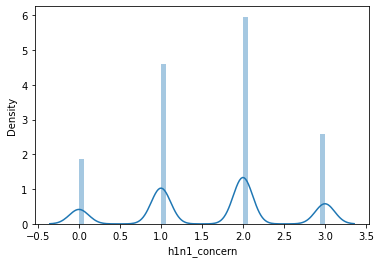

In [22]:
sns.distplot(df1.h1n1_concern,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

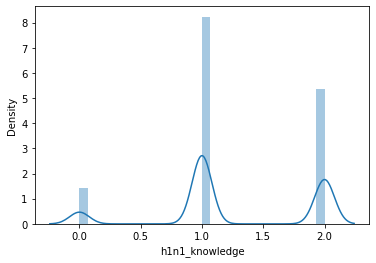

In [23]:
sns.distplot(df1.h1n1_knowledge,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

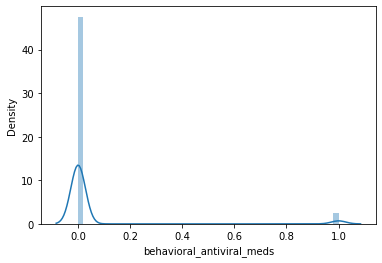

In [24]:
sns.distplot(df1.behavioral_antiviral_meds,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

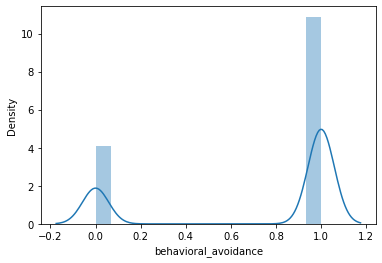

In [25]:
sns.distplot(df1.behavioral_avoidance,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

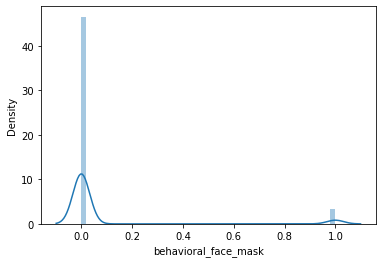

In [26]:
sns.distplot(df1.behavioral_face_mask,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

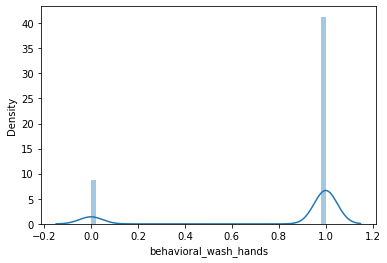

In [27]:
sns.distplot(df1.behavioral_wash_hands,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

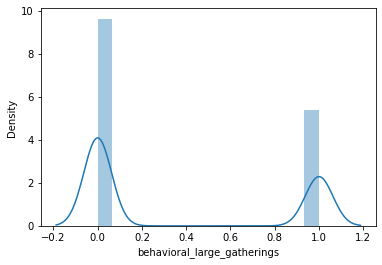

In [28]:
sns.distplot(df1.behavioral_large_gatherings,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

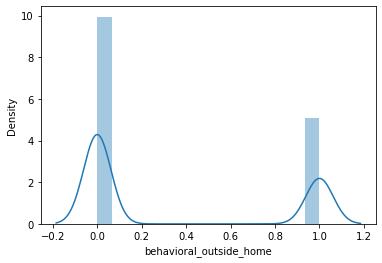

In [29]:
sns.distplot(df1.behavioral_outside_home,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

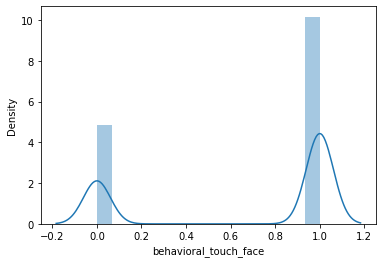

In [30]:
sns.distplot(df1.behavioral_touch_face,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

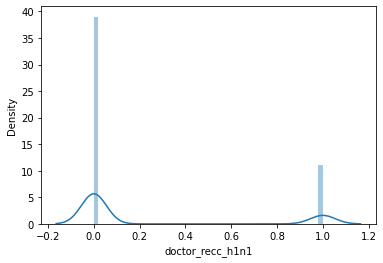

In [31]:
sns.distplot(df1.doctor_recc_h1n1,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

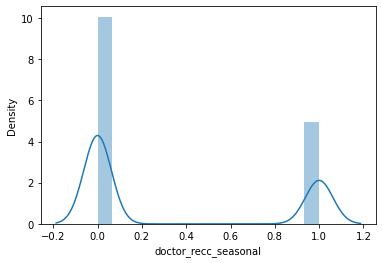

In [32]:
sns.distplot(df1.doctor_recc_seasonal,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

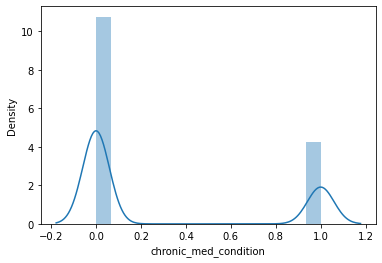

In [33]:
sns.distplot(df1.chronic_med_condition,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

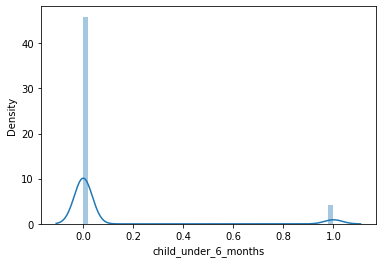

In [34]:
sns.distplot(df1.child_under_6_months,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

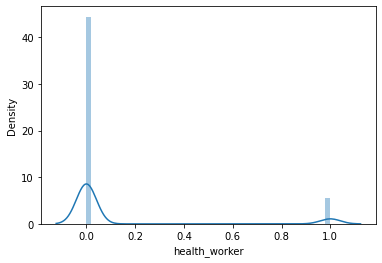

In [35]:
sns.distplot(df1.health_worker,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

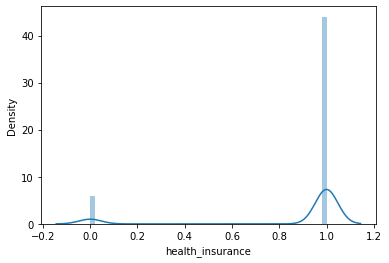

In [36]:
sns.distplot(df1.health_insurance,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

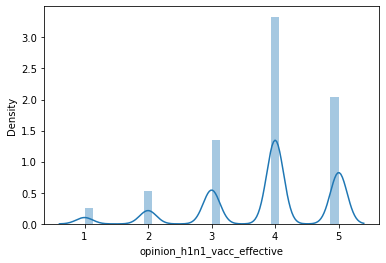

In [37]:
sns.distplot(df1.opinion_h1n1_vacc_effective,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

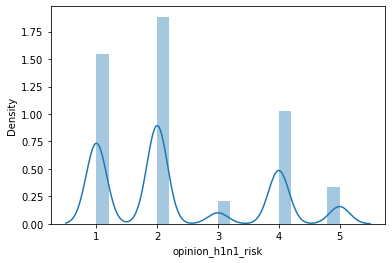

In [38]:
sns.distplot(df1.opinion_h1n1_risk,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

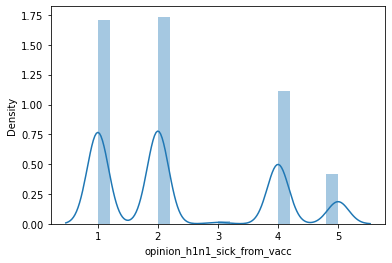

In [39]:
sns.distplot(df1.opinion_h1n1_sick_from_vacc,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

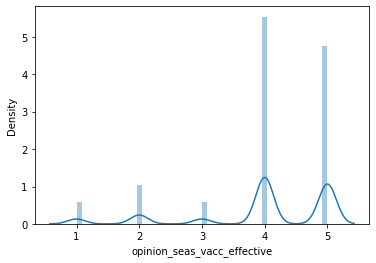

In [40]:
sns.distplot(df1.opinion_seas_vacc_effective,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

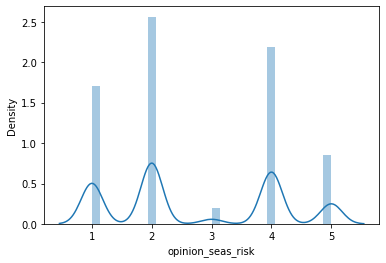

In [41]:
sns.distplot(df1.opinion_seas_risk,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

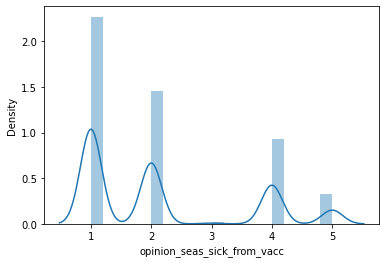

In [42]:
sns.distplot(df1.opinion_seas_sick_from_vacc,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

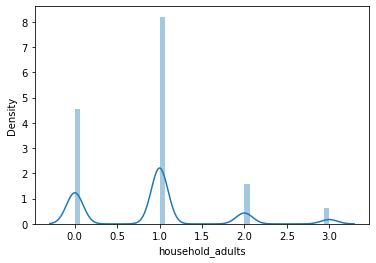

In [43]:
sns.distplot(df1.household_adults,kde=True)
plt.show

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

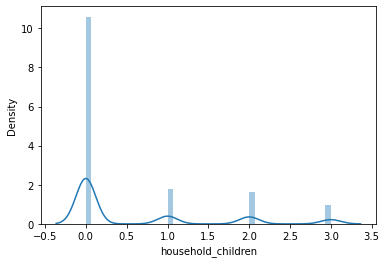

In [44]:
sns.distplot(df1.household_children,kde=True)
plt.show

From distrubution plots  all of the distrubtions are almost normal distrubtion so fillthe missing vale by mean

In [45]:
# For float fill missing values with the mean

df1 = df1.fillna(df1.mean())
df1 = round(df1)

# For string fill missing value with 'No Category'

df1 = df1.fillna('No Category')

C:\Users\hp\AppData\Local\Temp\ipykernel_62504\2723968646.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df1.fillna(df1.mean())


In [46]:
df1.isnull().sum()


h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

# Finding the unique values of features

In [47]:
print("h1n1_concern")
print(df1.h1n1_concern.unique())

print("h1n1_knowledge")
print(df1.h1n1_knowledge.unique())

print("behavioral_antiviral_meds")
print(df1.behavioral_antiviral_meds.unique())

print("behavioral_avoidance")
print(df1.behavioral_avoidance.unique())

print("behavioral_face_mask")
print(df1.behavioral_face_mask.unique())

print("behavioral_wash_hands")
print(df1.behavioral_wash_hands.unique())

print("behavioral_large_gatherings")
print(df1.behavioral_large_gatherings.unique())

print("behavioral_outside_home")
print(df1.behavioral_outside_home.unique())

print("behavioral_touch_face")
print(df1.behavioral_touch_face.unique())

print("doctor_recc_h1n1")
print(df1.doctor_recc_h1n1.unique())

print("doctor_recc_seasonal")
print(df1.doctor_recc_seasonal.unique())

print("chronic_med_condition")
print(df1.chronic_med_condition.unique())

print("child_under_6_months")
print(df1.child_under_6_months.unique())

print("health_worker")
print(df1.health_worker.unique())

print("health_insurance")
print(df1.health_insurance.unique())

print("opinion_h1n1_vacc_effective")
print(df1.opinion_h1n1_vacc_effective.unique())

print("opinion_h1n1_risk")
print(df1.opinion_h1n1_risk.unique())

print("opinion_h1n1_sick_from_vacc")
print(df1.opinion_h1n1_sick_from_vacc.unique())

print("opinion_seas_vacc_effective")
print(df1.opinion_seas_vacc_effective.unique())

print("opinion_seas_risk")
print(df1.opinion_seas_risk.unique())

print("opinion_seas_sick_from_vacc")
print(df1.opinion_seas_sick_from_vacc.unique())

h1n1_concern
[1. 3. 2. 0.]
h1n1_knowledge
[0. 2. 1.]
behavioral_antiviral_meds
[0. 1.]
behavioral_avoidance
[0. 1.]
behavioral_face_mask
[0. 1.]
behavioral_wash_hands
[0. 1.]
behavioral_large_gatherings
[0. 1.]
behavioral_outside_home
[1. 0.]
behavioral_touch_face
[1. 0.]
doctor_recc_h1n1
[0. 1.]
doctor_recc_seasonal
[0. 1.]
chronic_med_condition
[0. 1.]
child_under_6_months
[0. 1.]
health_worker
[0. 1.]
health_insurance
[1. 0.]
opinion_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
opinion_h1n1_risk
[1. 4. 3. 2. 5.]
opinion_h1n1_sick_from_vacc
[2. 4. 1. 5. 3.]
opinion_seas_vacc_effective
[2. 4. 5. 3. 1.]
opinion_seas_risk
[1. 2. 4. 3. 5.]
opinion_seas_sick_from_vacc
[2. 4. 1. 5. 3.]


In [48]:
print("age_group")
print(df1.age_group.unique())

print("education")
print(df1.education.unique())

print("race")
print(df1.race.unique())

print("income_poverty")
print(df1.income_poverty.unique())

print("marital_status")
print(df1.marital_status.unique())

print("rent_or_own")
print(df1.rent_or_own.unique())

print("employment_status")
print(df1.employment_status.unique())

print("hhs_geo_region")
print(df1.hhs_geo_region.unique())

print("census_msa")
print(df1.census_msa.unique())

print("employment_industry")
print(df1.employment_industry.unique())

print("employment_occupation")
print(df1.employment_occupation.unique())

age_group
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_poverty
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
rent_or_own
['Own' 'Rent' 'No Category']
employment_status
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
hhs_geo_region
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry
['No Category' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo'
 'cfqqtusy' 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation
['No Category' 'xgw

# Encoding the categorical object

In [49]:
ln = LabelEncoder()

In [50]:
df1.age_group = ln.fit_transform(df1.age_group)
df1.education = ln.fit_transform(df1.education)
df1.race = ln.fit_transform(df1.race)
df1.sex = ln.fit_transform(df1.sex)
df1.income_poverty = ln.fit_transform(df1.income_poverty)
df1.marital_status = ln.fit_transform(df1.marital_status)
df1.rent_or_own = ln.fit_transform(df1.rent_or_own)
df1.employment_status = ln.fit_transform(df1.employment_status)
df1.hhs_geo_region = ln.fit_transform(df1.hhs_geo_region)
df1.census_msa = ln.fit_transform(df1.census_msa)
df1.employment_industry = ln.fit_transform(df1.employment_industry)
df1.employment_occupation = ln.fit_transform(df1.employment_occupation)

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

# Checking the dataset

In [52]:
df1.head(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2,2,1,2,8,2,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2,2,2,0,1,0,0.0,0.0,13,20
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,9,0,2.0,0.0,15,22
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2,2,2,2,5,1,0.0,0.0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,1,0,9,0,1.0,0.0,19,6


In [53]:
df1.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,0.953795,0.932190,1.145542,0.984161,4.829745,0.833489,0.887558,0.538922,5.290710,6.242371
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,1.113444,0.970936,0.526582,1.052723,2.805984,0.823313,0.749980,0.924918,7.079824,7.957241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,2.000000,1.000000,2.000000,7.000000,2.000000,1.000000,1.000000,9.000000,11.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,2.000000,3.000000,9.000000,2.000000,3.000000,3.000000,21.000000,23.000000


# Visualising numerical data

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\AppData\Local\Temp\ipykernel

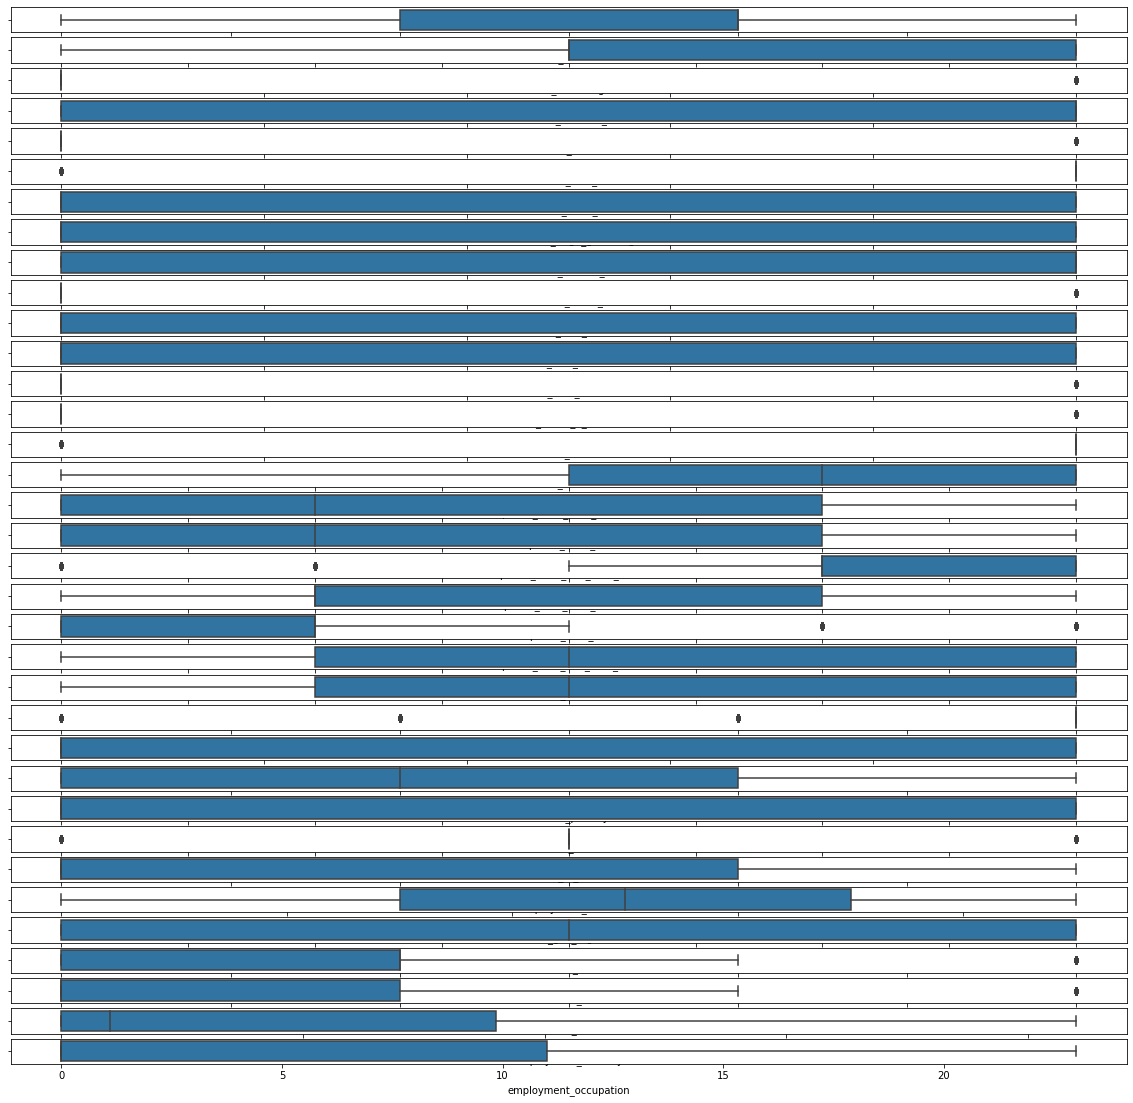

In [54]:
plt.figure(figsize=(20,20))
pltnum=1
for i in df1.columns:
    plt.subplot(36,1,pltnum)
    sns.boxplot(df1[i])
    pltnum+=1
plt.tight_layout()
plt.show()

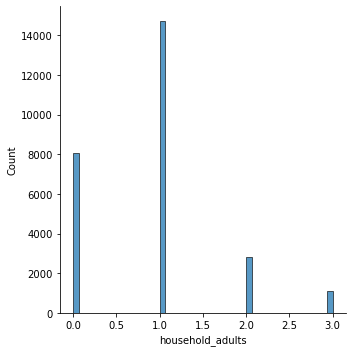

In [55]:
sns.displot(df1.household_adults)

Number of other adults in household is mostly 1.

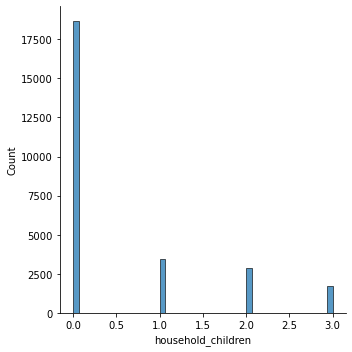

In [56]:
sns.displot(df1.household_children)


Number of children in household is mostly 0

# Visualising categorical data

In [57]:
df1.h1n1_concern.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


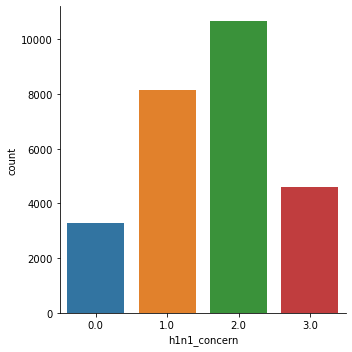

In [58]:
sns.factorplot('h1n1_concern', data = df1, kind = "count")

Most of the people are somewhat concerned about h1n1 vaccine.

In [59]:
df1.h1n1_knowledge.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


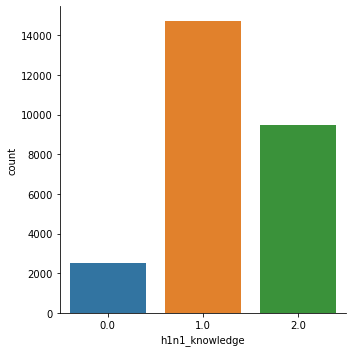

In [60]:
sns.factorplot('h1n1_knowledge', data = df1, kind = "count")

Almost 90% of people have little or lots of knowledge about h1n1 vaccine.

In [61]:
df1.behavioral_antiviral_meds.value_counts()

0.0    25406
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


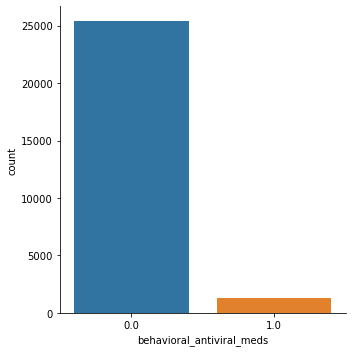

In [62]:
sns.factorplot('behavioral_antiviral_meds', data = df1, kind = "count")

In [63]:
df1.behavioral_avoidance.value_counts()

1.0    19436
0.0     7271
Name: behavioral_avoidance, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


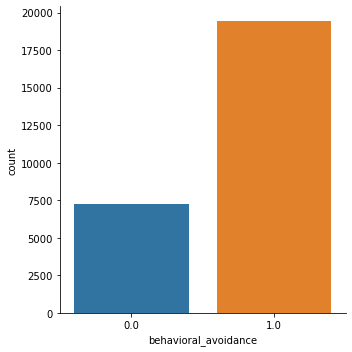

In [64]:
sns.factorplot('behavioral_avoidance', data = df1, kind = "count")

70% of people have avoided contact with people with symptoms.


In [65]:
df1.behavioral_face_mask.value_counts()

0.0    24866
1.0     1841
Name: behavioral_face_mask, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


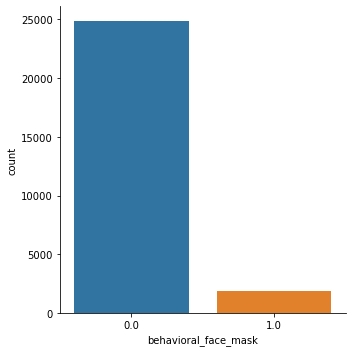

In [66]:
sns.factorplot('behavioral_face_mask', data = df1, kind = "count")

Very few people have bought a face mask.

In [67]:
df1.behavioral_wash_hands.value_counts()


1.0    22057
0.0     4650
Name: behavioral_wash_hands, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


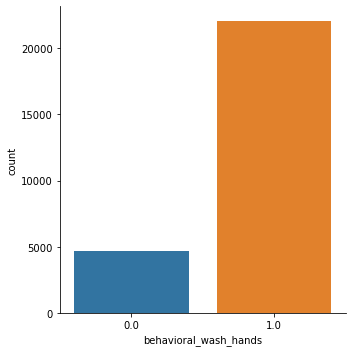

In [68]:
sns.factorplot('behavioral_wash_hands', data = df1, kind = "count")

80% of people have frequently washed their hands.

In [69]:
df1.behavioral_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


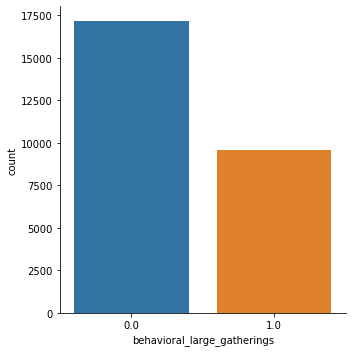

In [70]:
sns.factorplot('behavioral_large_gatherings', data = df1, kind = "count")

Few people have reduced time at large gatherings

In [71]:
df1.behavioral_outside_home.value_counts()

0.0    17726
1.0     8981
Name: behavioral_outside_home, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


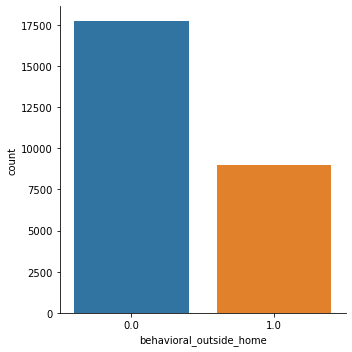

In [72]:
sns.factorplot('behavioral_outside_home', data = df1, kind = "count")

Only few people have reduced contact with people outside their household


In [73]:
df1.behavioral_touch_face.value_counts()

1.0    18129
0.0     8578
Name: behavioral_touch_face, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


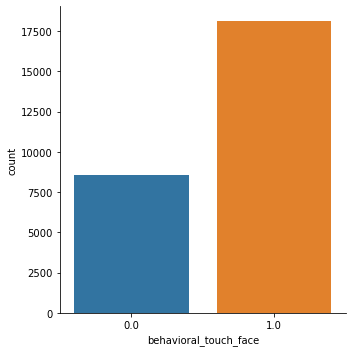

In [74]:
sns.factorplot('behavioral_touch_face', data = df1, kind = "count")

70% of people have avoided touching eyes, nose, or mouth.

In [75]:
df1.doctor_recc_h1n1.value_counts()

0.0    21299
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


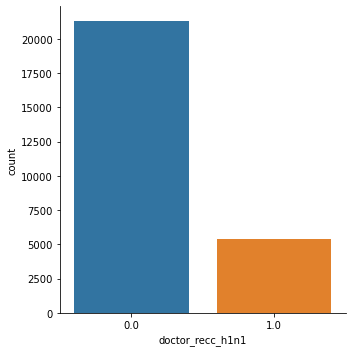

In [76]:
sns.factorplot('doctor_recc_h1n1', data = df1, kind = "count")

Doctors recommended the h1n1 vaccine to only 20% of people.

In [77]:
df1.doctor_recc_seasonal.value_counts()

0.0    18613
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


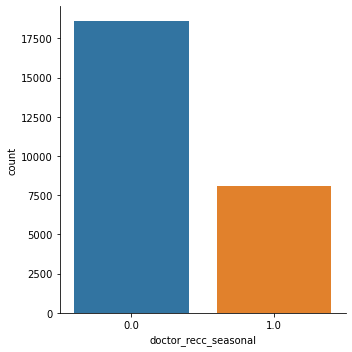

In [78]:
sns.factorplot('doctor_recc_seasonal', data = df1, kind = "count")

Doctors recommended seasonal vaccine to only 30% of people.

In [79]:
df1.chronic_med_condition .value_counts()

0.0    19417
1.0     7290
Name: chronic_med_condition, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


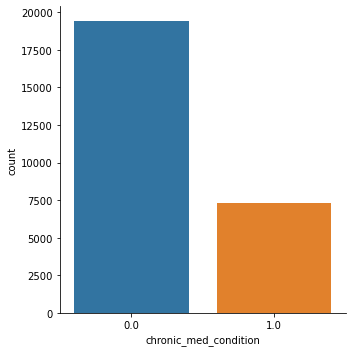

In [80]:
sns.factorplot('chronic_med_condition', data = df1, kind = "count")

Only less than 30% of people have chronic medical conditions.

In [81]:
df1.child_under_6_months.value_counts()

0.0    24569
1.0     2138
Name: child_under_6_months, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


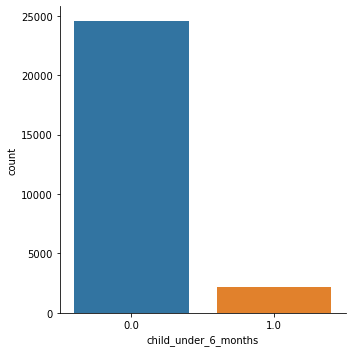

In [82]:
sns.factorplot('child_under_6_months', data = df1, kind = "count")

Very few people had close contact with child under 6 months.

In [83]:
df1.health_worker.value_counts()


0.0    23808
1.0     2899
Name: health_worker, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


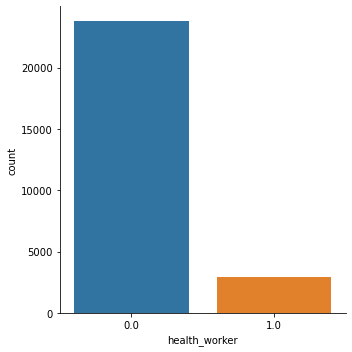

In [84]:
sns.factorplot('health_worker', data = df1, kind = "count")

Very few people work in healthcare.

In [85]:
df1.health_insurance.value_counts()

1.0    24971
0.0     1736
Name: health_insurance, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


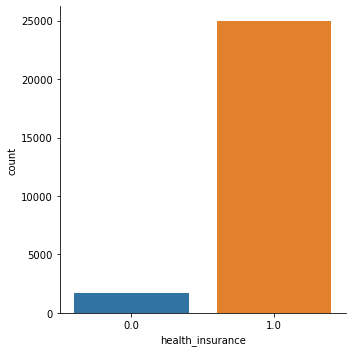

In [86]:
sns.factorplot('health_insurance', data = df1, kind = "count")

Almost everyone has health insurance.

In [87]:
df1.opinion_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: opinion_h1n1_vacc_effective, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


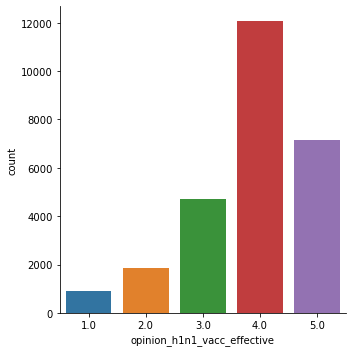

In [88]:
sns.factorplot('opinion_h1n1_vacc_effective', data = df1, kind = "count")

Most of the people think h1n1 is somewhat effective.

In [89]:
df1.opinion_h1n1_risk.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: opinion_h1n1_risk, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


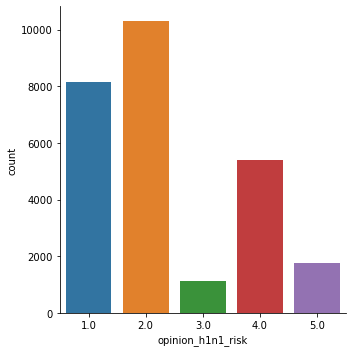

In [90]:
sns.factorplot('opinion_h1n1_risk', data = df1, kind = "count")

Most people believe the h1n1 vaccine has somewhat low or very low risk.

In [91]:
df1.opinion_h1n1_sick_from_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: opinion_h1n1_sick_from_vacc, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


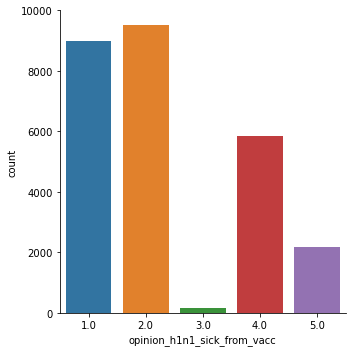

In [92]:
sns.factorplot('opinion_h1n1_sick_from_vacc', data = df1, kind = "count")

Most people are not at all worried or not very worried of getting sick from h1n1 vaccine.

In [93]:
df1.opinion_seas_vacc_effective.value_counts()

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


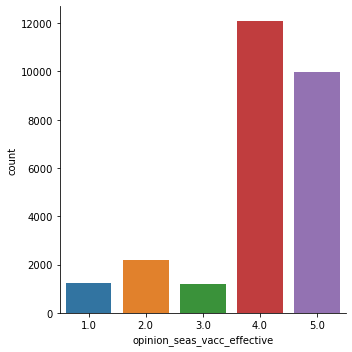

In [94]:
sns.factorplot('opinion_seas_vacc_effective', data = df1, kind = "count")

Most people think seasonal vaccine is somewhat or very effective.

In [95]:
df1.opinion_seas_risk.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0    1191
Name: opinion_seas_risk, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


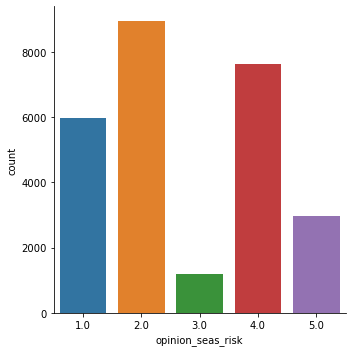

In [96]:
sns.factorplot('opinion_seas_risk', data = df1, kind = "count")

Majority of people think the riske of seasonal vaccine are somewhat low.

In [97]:
df1.opinion_seas_sick_from_vacc.value_counts()

1.0    11870
2.0     8170
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


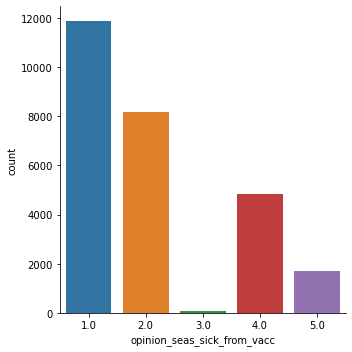

In [98]:
sns.factorplot('opinion_seas_sick_from_vacc', data = df1, kind = "count")

Majority of people are not at all worried of getting sick from seasonal vaccine.

# Visualising labels

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


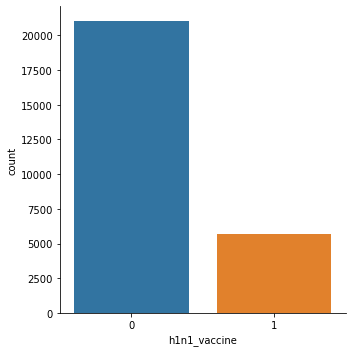

In [99]:
sns.factorplot('h1n1_vaccine', data = df2, kind = "count")


C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


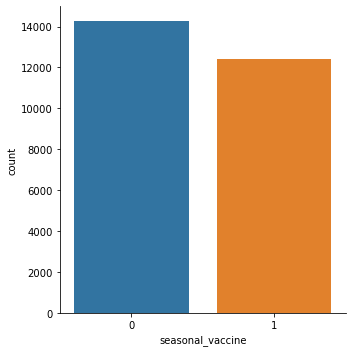

In [100]:
sns.factorplot('seasonal_vaccine', data = df2, kind = "count")

# FEATURE SCALING

# Using Min Max scaler

In [101]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

In [102]:
df1 = pd.DataFrame(df1)
col_name = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']
df1.columns = col_name

# FEATURE SELECTION

# Independent and target variables

In [103]:
X = df1
y = df2

#  Using ExtraTrees Classifier

[0.03238315 0.02708293 0.00795636 0.01797655 0.00984895 0.01267038
 0.01931977 0.01903786 0.01763975 0.05456876 0.05906704 0.01824324
 0.01080201 0.01758142 0.00765173 0.04374347 0.04588785 0.0322863
 0.0580957  0.07330024 0.03161324 0.05044993 0.0312746  0.02014257
 0.02087836 0.02862673 0.02022441 0.02020642 0.01699774 0.04132445
 0.03147065 0.02663465 0.02238963 0.02575423 0.02686892]


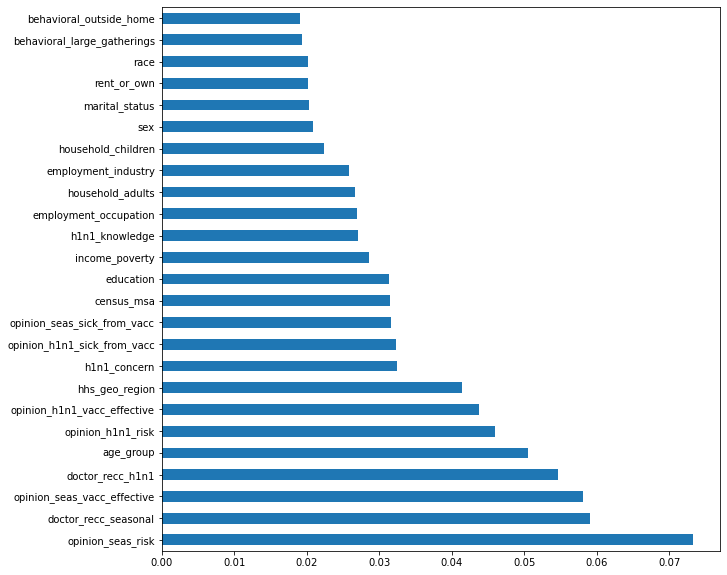

In [104]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

# Correlation Matrix using Heatmap

In [105]:
df1.corrwith(df2.h1n1_vaccine)

h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
behavioral_antiviral_meds      0.040226
behavioral_avoidance           0.046837
behavioral_face_mask           0.070413
behavioral_wash_hands          0.074570
behavioral_large_gatherings    0.018089
behavioral_outside_home        0.022080
behavioral_touch_face          0.070855
doctor_recc_h1n1               0.394086
doctor_recc_seasonal           0.218976
chronic_med_condition          0.094360
child_under_6_months           0.066712
health_worker                  0.168056
health_insurance               0.041891
opinion_h1n1_vacc_effective    0.267352
opinion_h1n1_risk              0.320580
opinion_h1n1_sick_from_vacc    0.074580
opinion_seas_vacc_effective    0.177799
opinion_seas_risk              0.255955
opinion_seas_sick_from_vacc    0.008415
age_group                      0.041074
education                      0.020766
race                           0.041061
sex                           -0.020672


In [106]:
df1.corrwith(df2.seasonal_vaccine)

h1n1_concern                   0.154488
h1n1_knowledge                 0.119779
behavioral_antiviral_meds      0.006013
behavioral_avoidance           0.076130
behavioral_face_mask           0.050020
behavioral_wash_hands          0.112254
behavioral_large_gatherings    0.063722
behavioral_outside_home        0.053287
behavioral_touch_face          0.119925
doctor_recc_h1n1               0.198560
doctor_recc_seasonal           0.360696
chronic_med_condition          0.169465
child_under_6_months           0.013424
health_worker                  0.126977
health_insurance               0.124929
opinion_h1n1_vacc_effective    0.203187
opinion_h1n1_risk              0.215650
opinion_h1n1_sick_from_vacc    0.027964
opinion_seas_vacc_effective    0.358869
opinion_seas_risk              0.385668
opinion_seas_sick_from_vacc   -0.060538
age_group                      0.277454
education                      0.002553
race                           0.101743
sex                           -0.077091


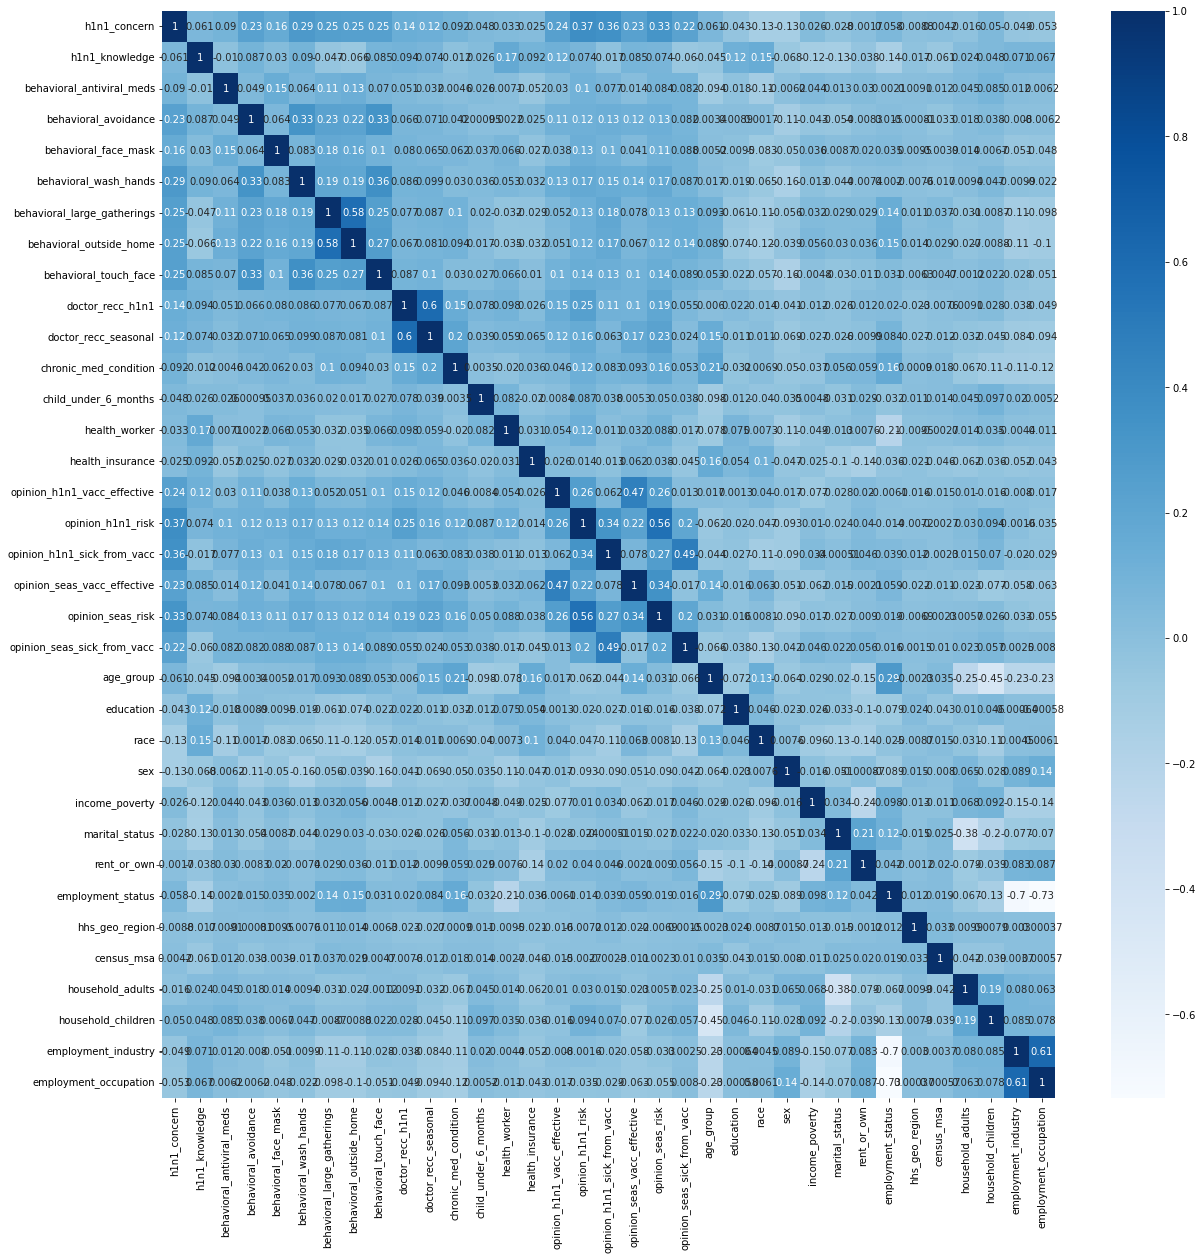

In [107]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="Blues")

In [108]:
df1.drop(['opinion_seas_sick_from_vacc','hhs_geo_region','census_msa',
               'household_adults','household_children','behavioral_antiviral_meds',
               'education'], axis = 1, inplace = True)

# MODEL

# Defining independent and dependent variables

In [109]:
X = df1
y = df2

In [110]:
X

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_seas_risk,age_group,race,sex,income_poverty,marital_status,rent_or_own,employment_status,employment_industry,employment_occupation
0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.00,0.75,1.000000,0.0,0.666667,1.0,0.5,0.666667,0.000000,0.000000
1,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.25,0.25,1.000000,1.0,0.666667,1.0,1.0,0.000000,0.619048,0.869565
2,0.333333,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.000000,1.0,0.000000,1.0,0.5,0.000000,0.714286,0.956522
3,0.333333,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.75,1.00,1.000000,0.0,0.666667,1.0,1.0,0.666667,0.000000,0.000000
4,0.666667,0.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.00,0.50,1.000000,0.0,0.000000,0.0,0.5,0.000000,0.904762,0.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.25,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667,0.000000,0.000000
26703,0.333333,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.00,0.00,1.000000,1.0,0.000000,1.0,1.0,0.000000,0.238095,0.130435
26704,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.75,0.75,1.000000,0.0,1.000000,1.0,0.5,0.333333,0.000000,0.000000
26705,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.00,0.00,0.333333,0.0,0.000000,0.0,1.0,0.000000,0.238095,0.304348


In [111]:
y

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [112]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

# Using Binary Relevance 

# LogisticRegression

In [128]:
model_BR_LR = BinaryRelevance(LogisticRegression())
model_BR_LR.fit(x_train,y_train)
y_pred_BR_LR = model_BR_LR.predict(x_test)
BR_LR = accuracy_score(y_test,y_pred_BR_LR)
BR_LR

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6717833520529141

# Decision Tree Classifier

In [134]:
model_BR_DT= BinaryRelevance(DecisionTreeClassifier())
model_BR_DT.fit(x_train,y_train)
y_pred_BR_DT = model_BR_DT.predict(x_test)
BR_DT = accuracy_score(y_test,y_pred_BR_DT)
BR_DT

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.5190315736927493

# RandomForestClassifier

In [133]:
model_BR_RFC = BinaryRelevance(RandomForestClassifier())
model_BR_RFC.fit(x_train,y_train)
y_pred_BR_RFC = model_BR_RFC.predict(x_test)
BR_RFC = accuracy_score(y_test,y_pred_BR_RFC)
BR_RFC

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.6616747784849619

# KNeighbors Classifier

In [135]:
model_BR_KNC = BinaryRelevance(KNeighborsClassifier())
model_BR_KNC.fit(x_train,y_train)
y_pred_BR_KNC = model_BR_KNC.predict(x_test)
BR_KNC = accuracy_score(y_test,y_pred_BR_KNC)
BR_KNC

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.6040184699862723

# xgboost Classifier

In [138]:
model_BR_xgb = BinaryRelevance(XGBClassifier())
model_BR_xgb.fit(x_train,y_train)
y_pred_BR_xgb = model_BR_xgb.predict(x_test)
BR_xgb = accuracy_score(y_test,y_pred_BR_xgb)
BR_xgb

0.6629227505303881

# Using Classifier Chains

# LogisticRegression

In [139]:
model_CC_LR = ClassifierChain(LogisticRegression())
model_CC_LR.fit(x_train,y_train)
y_pred_CC_LR = model_CC_LR.predict(x_test)
CC_LR = accuracy_score(y_test,y_pred_CC_LR)
CC_LR

0.670784974416573

# Decision Tree Classifier

In [140]:
model_CC_DT = ClassifierChain(DecisionTreeClassifier())
model_CC_DT.fit(x_train,y_train)
y_pred_CC_DT = model_CC_DT.predict(x_test)
CC_DT = accuracy_score(y_test,y_pred_CC_DT)
CC_DT

0.5427430425558467

# Random Forest Classifier

In [141]:
model_CC_RFC = ClassifierChain(RandomForestClassifier())
model_CC_RFC.fit(x_train,y_train)
y_pred_CC_RFC = model_CC_RFC.predict(x_test)
CC_RFC = accuracy_score(y_test,y_pred_CC_RFC)
CC_RFC

0.6664170722575814

# KNeighbors Classifier

In [142]:
model_CC_KNC = ClassifierChain(KNeighborsClassifier())
model_CC_KNC.fit(x_train,y_train)
y_pred_CC_KNC = model_CC_KNC.predict(x_test)
CC_KNC = accuracy_score(y_test,y_pred_CC_KNC)
CC_KNC

0.6072631973043804

# xgboost Classifier

In [143]:
model_CC_xgb = ClassifierChain(XGBClassifier())
model_CC_xgb.fit(x_train,y_train)
y_pred_CC_xgb = model_CC_xgb.predict(x_test)
CC_xgb = accuracy_score(y_test,y_pred_CC_xgb)
CC_xgb

0.6697865967802321

# Using Label Powerset 

# LogisticRegression

In [144]:
model_LP_LR = LabelPowerset(LogisticRegression())
model_LP_LR.fit(x_train,y_train)
y_pred_LP_LR = model_LP_LR.predict(x_test)
LP_LR = accuracy_score(y_test,y_pred_LP_LR)
LP_LR

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6752776737801073

# Decision Tree Classifier

In [145]:
model_LP_DT = LabelPowerset(DecisionTreeClassifier())
model_LP_DT.fit(x_train,y_train)
y_pred_LP_DT = model_LP_DT.predict(x_test)
LP_DT = accuracy_score(y_test,y_pred_LP_DT)
LP_DT

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.5424934481467615

# Random Forest Classifier

In [146]:
model_LP_RFC = LabelPowerset(RandomForestClassifier())
model_LP_RFC.fit(x_train,y_train)
y_pred_LP_RFC = model_LP_RFC.predict(x_test)
LP_RFC = accuracy_score(y_test,y_pred_LP_RFC)
LP_RFC

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.6696617995756895

# KNeighbors Classifier

In [147]:
model_LP_KNC = LabelPowerset(KNeighborsClassifier())
model_LP_KNC.fit(x_train,y_train)
y_pred_LP_KNC = model_LP_KNC.predict(x_test)
LP_KNC = accuracy_score(y_test,y_pred_LP_KNC)
LP_KNC

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.5994009734181954

# xgboost Classifier

In [149]:
model_LP_xgb= LabelPowerset(XGBClassifier())
model_LP_xgb.fit(x_train,y_train)
y_pred_LP_xgb = model_LP_xgb.predict(x_test)
LP_xgb = accuracy_score(y_test,y_pred_LP_xgb)
LP_xgb

0.6717833520529141

# MODEL EVALUATION

# Accuracy score comparison chart

In [150]:
Accuracy_Score = [BR_LR,BR_DT,BR_RFC,BR_KNC,BR_xgb,CC_LR,CC_DT,CC_RFC,CC_KNC,CC_xgb,LP_LR,LP_DT,LP_RFC,LP_KNC,LP_xgb]
Models = ['BR LogisticRegression', 'BR Decision Tree Classifier' , 'BR Random Forest Classifier', 'BR KNeighbors Classifier', 'BR xgboost Classifier',
          'CC LogisticRegression', 'CC Decision Tree Classifier' , 'CC Random Forest Classifier', 'CC KNeighbors Classifier', 'CC xgboost Classifier',
          'LP LogisticRegression', 'LP Decision Tree Classifier' , 'LP Random Forest Classifier', 'LP KNeighbors Classifier', 'LP xgboost Classifier']
        

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


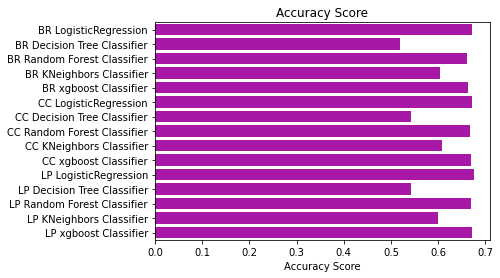

In [151]:
sns.barplot(Accuracy_Score, Models, color="m")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

In [ ]:
RANDOM FOREST HAS THE HIGHEST ACCURACY SCORE.
So Rand